In [2]:
import geopandas as gpd

# Load the shapefiles
gdf_large = gpd.read_file("Large_data_Cleaned_2.shp")
gdf_small = gpd.read_file("Small_data_2.shp")

# Display attribute tables (first 5 rows)
print("🔍 Attribute table of Large Dataset:")
print(gdf_large.head(), "\n")

print("🔍 Attribute table of Small Dataset:")
print(gdf_small.head(), "\n")

# Optional: Check columns of both files to ensure similarity
print("📋 Columns in Large Dataset:", gdf_large.columns.tolist())
print("📋 Columns in Small Dataset:", gdf_small.columns.tolist())

# Rename 'Distance_D' to 'Distance from Drainage' (if exists)
rename_column = {"Distance_D": "Distance from Drainage"}

gdf_large.rename(columns=rename_column, inplace=True)
gdf_small.rename(columns=rename_column, inplace=True)

# Show updated attribute tables
print("\n✅ Updated Attribute Table - Large Dataset:")
print(gdf_large.head())

print("\n✅ Updated Attribute Table - Small Dataset:")
print(gdf_small.head())


🔍 Attribute table of Large Dataset:
    Long_X    Lat_Y  Id  Aspect  Distance_D  Elevation  Plan_Curva  Flow_Accu  \
0  80.1929  12.9349   0       4         9.0          6           7        1.0   
1  80.1929  12.9519   0       6         8.0          6           7        1.0   
2  80.1929  12.9522   0       1         8.0          6           7        1.0   
3  80.1925  12.9526   0       4         7.0          6           7        1.0   
4  80.1929  12.9526   0       8         9.0          6           7        1.0   

   LULC  Slope  TWI  rainfall  Target_1  any_null  has_missin  \
0   5.0      9    2         4         0         0           0   
1   7.0      8    5         7         0         0           0   
2   6.0      9    2         7         0         0           0   
3   6.0      9    5         7         0         0           0   
4   7.0      9    5         7         0         0           0   

                         geometry  
0  POINT (412456.123 1430070.275)  
1  POINT (4124

In [3]:
# Step 1: Drop 'cluster' column if it exists in gdf_small
if 'cluster' in gdf_small.columns:
    gdf_small.drop(columns=['cluster'], inplace=True)
    print("✅ 'cluster' column dropped from small dataset.\n")

# Step 2: Compare columns
columns_large = set(gdf_large.columns)
columns_small = set(gdf_small.columns)

# Check if columns match
if columns_large == columns_small:
    print("✅ Column names match exactly between both datasets.\n")
else:
    print("❌ Column names do NOT match.\n")
    print("🧱 Columns in Large Dataset but not in Small:", columns_large - columns_small)
    print("🧱 Columns in Small Dataset but not in Large:", columns_small - columns_large)

# Step 3: Compare number of columns
print(f"\n📊 Number of columns:\n- Large: {len(gdf_large.columns)}\n- Small: {len(gdf_small.columns)}")

# Step 4: Show number of rows
print(f"\n📏 Number of rows:\n- Large: {len(gdf_large)}\n- Small: {len(gdf_small)}")


✅ 'cluster' column dropped from small dataset.

✅ Column names match exactly between both datasets.


📊 Number of columns:
- Large: 16
- Small: 16

📏 Number of rows:
- Large: 272212
- Small: 27747


✅ Dropped unnecessary columns.

📋 VIF and Tolerance Table:

                  Feature       VIF  Tolerance
2               Elevation  2.290032   0.436675
7                     TWI  1.858994   0.537925
8                rainfall  1.717945   0.582091
6                   Slope  1.470603   0.679993
9                Target_1  1.372195   0.728760
1  Distance from Drainage  1.223451   0.817360
3              Plan_Curva  1.084409   0.922161
0                  Aspect  1.071826   0.932987
4               Flow_Accu  1.036446   0.964835
5                    LULC  1.011906   0.988234

📈 Correlation Matrix:

                          Aspect  Distance from Drainage  Elevation  \
Aspect                  1.000000               -0.037242  -0.079168   
Distance from Drainage -0.037242                1.000000   0.368944   
Elevation              -0.079168                0.368944   1.000000   
Plan_Curva             -0.093427                0.037991   0.000245   
Flow_Accu              -0.002565            

C:\Users\Asus\AppData\Local\Temp\ipykernel_2492\2825689124.py:52: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


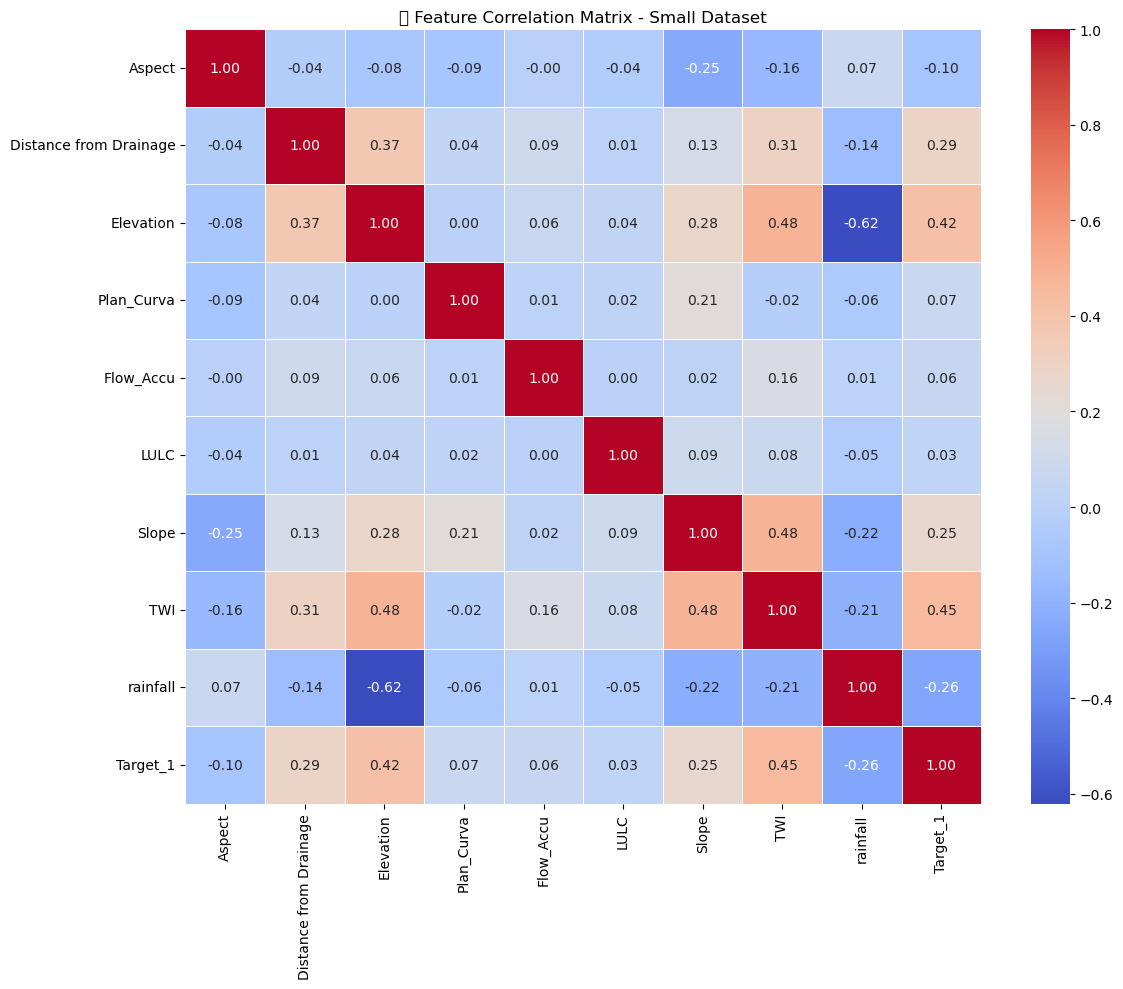

C:\Users\Asus\AppData\Local\Temp\ipykernel_2492\2825689124.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vif_data, x="VIF", y="Feature", palette="viridis")
C:\Users\Asus\AppData\Local\Temp\ipykernel_2492\2825689124.py:62: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


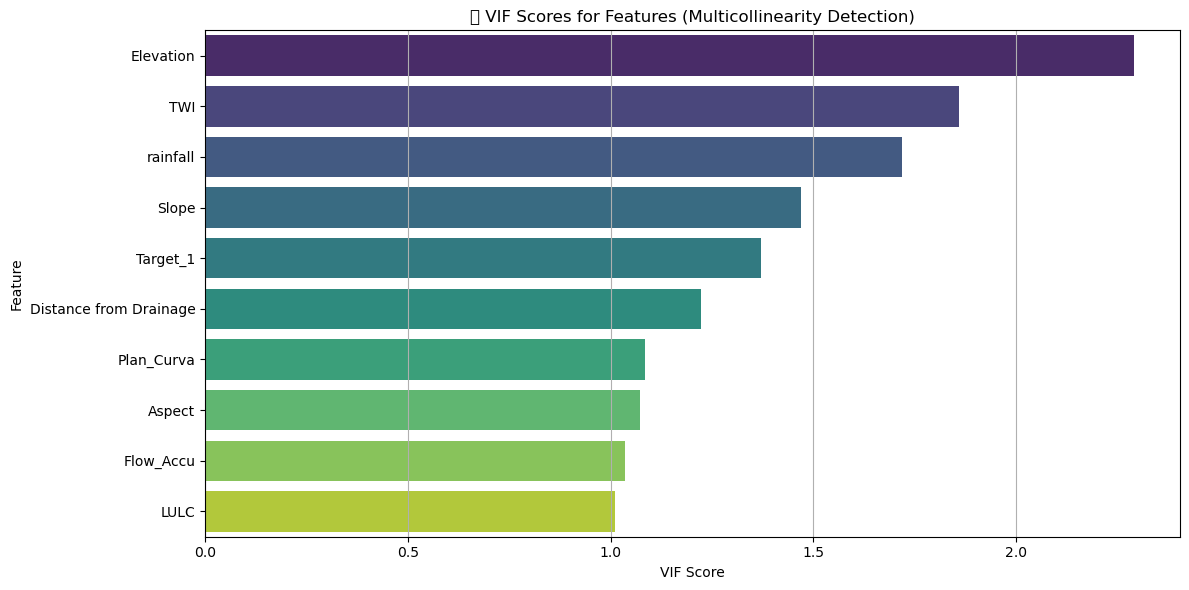

C:\Users\Asus\AppData\Local\Temp\ipykernel_2492\2825689124.py:91: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  plt.tight_layout()
C:\ProgramData\anaconda3\envs\Deep_Learning\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129518 (\N{ABACUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


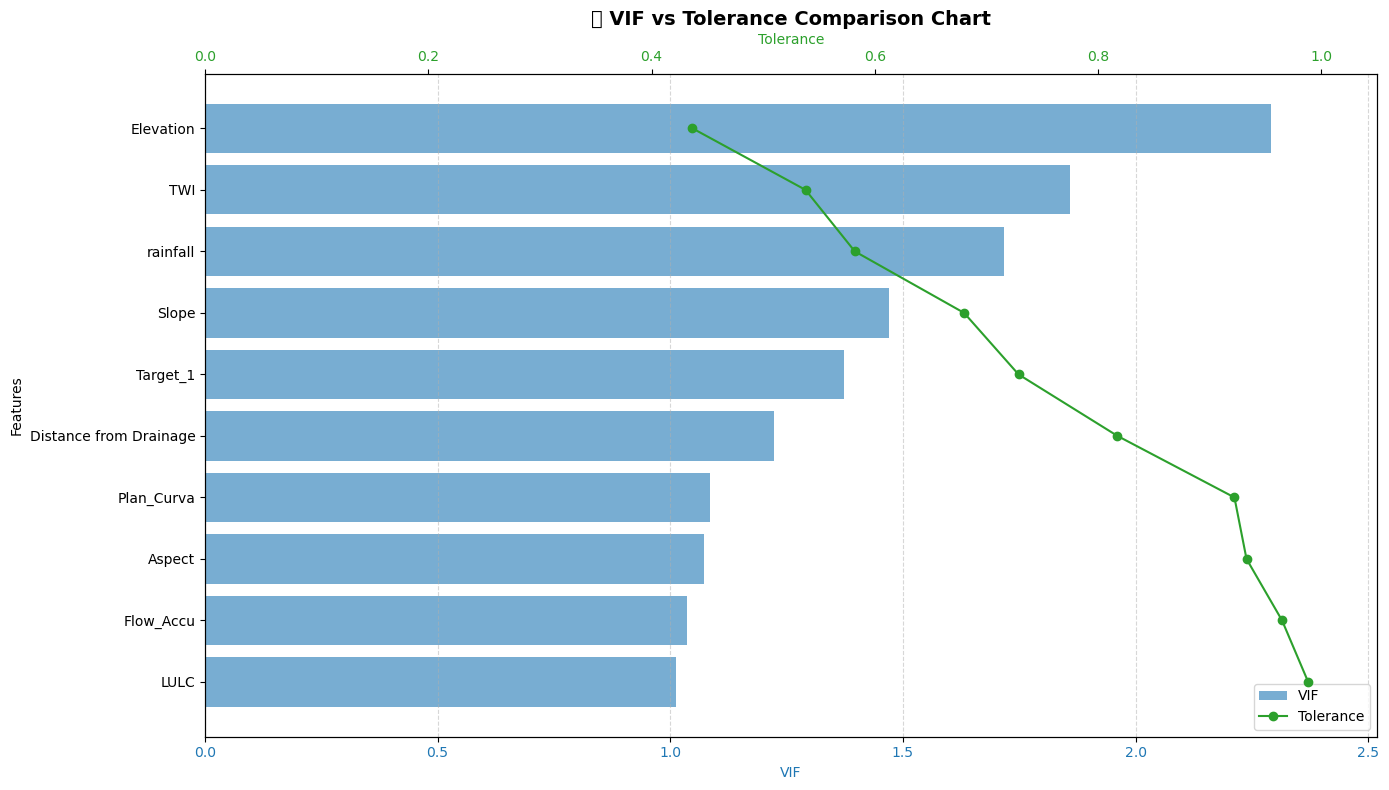

In [6]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# ------------------ STEP 1: Drop unwanted columns ------------------

columns_to_drop = ['Lat_Y', 'Long_X', 'Id', 'any_null', 'has_missin']

# Drop from both datasets
gdf_large.drop(columns=columns_to_drop, inplace=True, errors='ignore')
gdf_small.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("✅ Dropped unnecessary columns.\n")

# ------------------ STEP 2: Multicollinearity Analysis ------------------

# Convert to pandas DataFrame and drop geometry (not useful for VIF)
df_ml = gdf_small.drop(columns='geometry')

# Scale features for better VIF stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# Calculate VIF and Tolerance
vif_data = pd.DataFrame()
vif_data['Feature'] = df_ml.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data['Tolerance'] = 1 / vif_data['VIF']

# Sort by VIF descending
vif_data.sort_values(by="VIF", ascending=False, inplace=True)

print("📋 VIF and Tolerance Table:\n")
print(vif_data)

# ------------------ STEP 3: Correlation Matrix ------------------

corr_matrix = df_ml.corr()

# Display the matrix
print("\n📈 Correlation Matrix:\n")
print(corr_matrix)

# ------------------ STEP 4: Visualization ------------------

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Feature Correlation Matrix - Small Dataset")
plt.tight_layout()
plt.show()

# VIF Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=vif_data, x="VIF", y="Feature", palette="viridis")
plt.title("🚨 VIF Scores for Features (Multicollinearity Detection)")
plt.xlabel("VIF Score")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# ------------------ STEP 5: Innovative VIF + Tolerance Chart ------------------

fig, ax1 = plt.subplots(figsize=(14, 8))

# Sort for prettier visual
vif_plot_data = vif_data.sort_values("VIF", ascending=True)

# Plot VIF bars
color_vif = 'tab:blue'
ax1.barh(vif_plot_data["Feature"], vif_plot_data["VIF"], color=color_vif, alpha=0.6, label='VIF')
ax1.set_xlabel("VIF", color=color_vif)
ax1.tick_params(axis='x', labelcolor=color_vif)
ax1.set_xlim(0, max(vif_plot_data["VIF"]) * 1.1)
ax1.set_ylabel("Features")
ax1.set_title("🧮 VIF vs Tolerance Comparison Chart", fontsize=14, weight='bold')

# Create a second x-axis sharing the same y
ax2 = ax1.twiny()
color_tol = 'tab:green'
ax2.plot(vif_plot_data["Tolerance"], vif_plot_data["Feature"], "o-", color=color_tol, label='Tolerance')
ax2.set_xlabel("Tolerance", color=color_tol)
ax2.tick_params(axis='x', labelcolor=color_tol)
ax2.set_xlim(0, 1.05)

# Grid & Layout
ax1.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Legend
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='lower right')

plt.show()


✅ Data split into training and test sets.
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Params: {'rf__max_depth': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4567
           1       0.84      0.78      0.81      3758

    accuracy                           0.83      8325
   macro avg       0.83      0.83      0.83      8325
weighted avg       0.83      0.83      0.83      8325



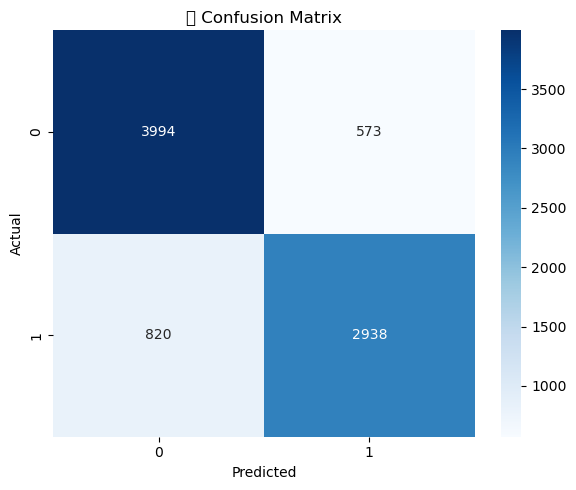

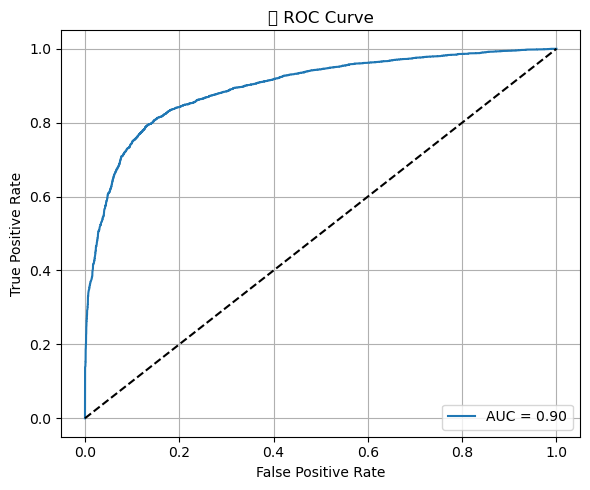

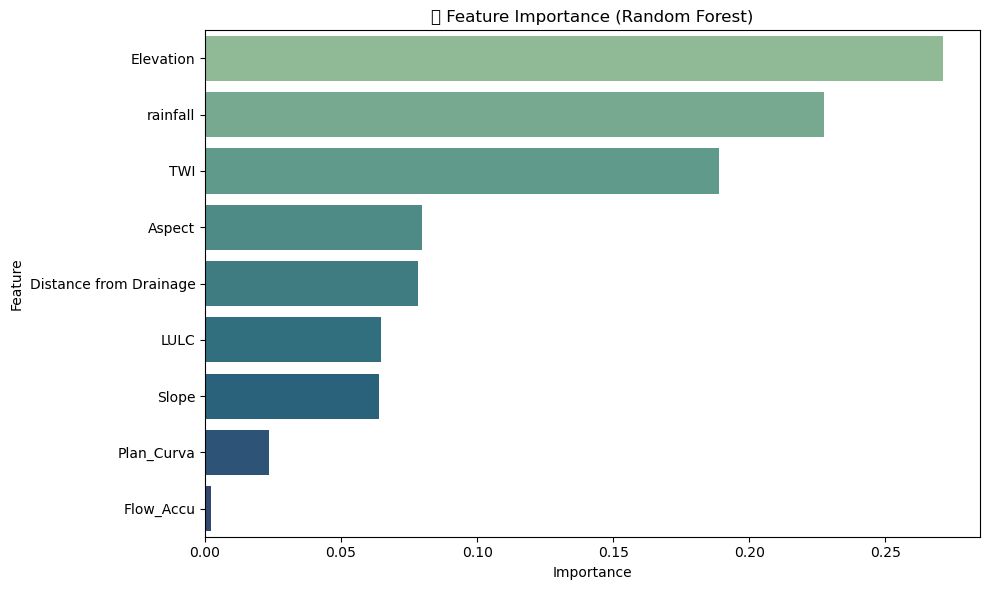

In [8]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (confusion_matrix, classification_report, 
                             accuracy_score, f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings("ignore")

# ------------------ STEP 1: Preprocess ------------------

# Drop geometry
df_ml = gdf_small.drop(columns='geometry')
X = df_ml.drop(columns='Target_1')
y = df_ml['Target_1']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

print("✅ Data split into training and test sets.")

# ------------------ STEP 2: Model Training with GridSearchCV ------------------

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"✅ Best Params: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

# ------------------ STEP 3: Evaluation ------------------

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🧮 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# ------------------ STEP 4: Feature Importance ------------------

rf_model = best_model.named_steps['rf']
importances = rf_model.feature_importances_

fi_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette="crest")
plt.title("🌟 Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()



In [9]:
# Drop target from larger dataset
X_large = gdf_large.drop(columns=['Target_1', 'geometry'], errors='ignore')

# Scale and predict probabilities
flood_prob = best_model.predict_proba(X_large)[:, 1]

# Add to GeoDataFrame
gdf_large['Flood_Prob'] = flood_prob

# ------------------ STEP 7: Export Shapefile ------------------
gdf_large.to_file("Predicted_Flood_Susceptibility.shp")

print("✅ Prediction probabilities added and shapefile exported.")


✅ Prediction probabilities added and shapefile exported.


🗺️ Bounds: 1057866.1269159026, 1426568.578723862, 1078369.1399147105, 1469295.7816738267
✅ Rasterization complete.
✅ Raster saved at: Flood_Prediction_45m.tif


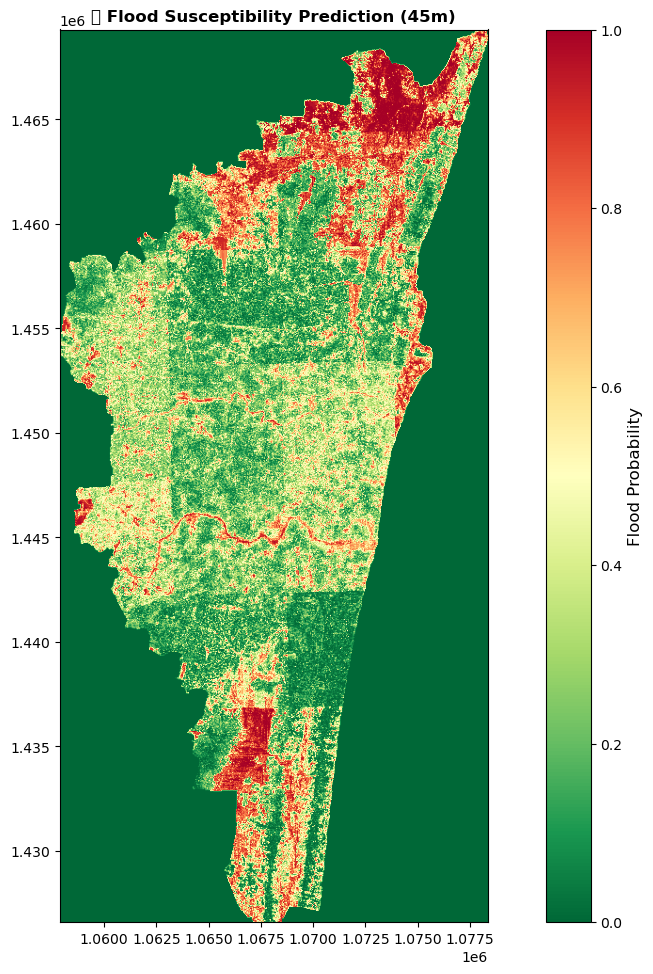

In [11]:
import geopandas as gpd
import rasterio
import rasterio.features  # ✅ FIX
from rasterio.transform import from_origin
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

# ------------------ STEP 1: Reproject and Setup ------------------

# Ensure projected CRS (meters!)
gdf_large = gdf_large.to_crs(epsg=32643)  # Replace with your correct UTM if needed

# Get bounds
minx, miny, maxx, maxy = gdf_large.total_bounds
print(f"🗺️ Bounds: {minx}, {miny}, {maxx}, {maxy}")

# Define pixel size (45 meters)
pixel_size = 45
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)

# Define affine transform
transform = from_origin(minx, maxy, pixel_size, pixel_size)

# ------------------ STEP 2: Rasterization ------------------

# (geometry, value) tuples
shapes = list(zip(gdf_large.geometry, gdf_large['Flood_Prob']))

raster = rasterio.features.rasterize(
    shapes=shapes,
    out_shape=(height, width),
    transform=transform,
    fill=0.0,
    all_touched=True,
    dtype='float32'
)

print("✅ Rasterization complete.")

# ------------------ STEP 3: Export Raster to GeoTIFF ------------------

raster_meta = {
    'driver': 'GTiff',
    'height': raster.shape[0],
    'width': raster.shape[1],
    'count': 1,
    'dtype': 'float32',
    'crs': gdf_large.crs,
    'transform': transform
}

raster_path = 'Flood_Prediction_45m.tif'

with rasterio.open(raster_path, 'w', **raster_meta) as dst:
    dst.write(raster, 1)

print(f"✅ Raster saved at: {raster_path}")

# ------------------ STEP 4: Visualization ------------------

with rasterio.open(raster_path) as src:
    fig, ax = plt.subplots(figsize=(12, 10))
    img = show(src, ax=ax, cmap='RdYlGn_r', title='🌊 Flood Susceptibility Prediction (45m)', vmin=0, vmax=1)
    cbar = plt.colorbar(img.get_images()[0], ax=ax, orientation='vertical')
    cbar.set_label('Flood Probability', fontsize=12)
    plt.tight_layout()
    plt.show()


🗺️ Bounds: 1057866.1269159026, 1426568.578723862, 1078369.1399147105, 1469295.7816738267
✅ Rasterization complete.
✅ Raster saved at: Flood_Prediction_45m.tif


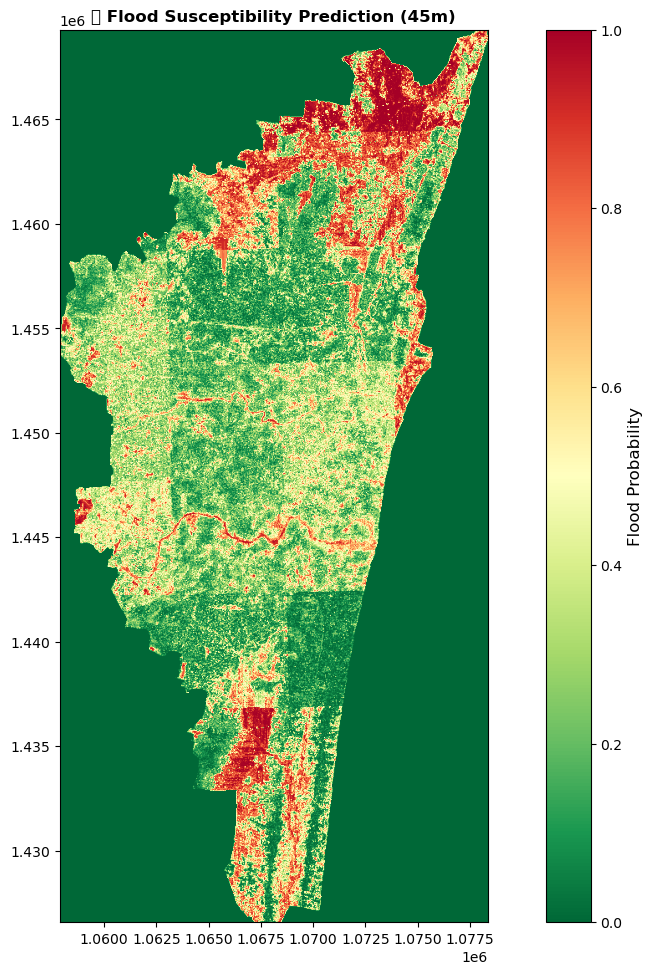

In [12]:
import geopandas as gpd
import rasterio
import rasterio.features  # ✅ FIX
from rasterio.transform import from_origin
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

# ------------------ STEP 1: Reproject and Setup ------------------

# Ensure projected CRS (meters!)
gdf_large = gdf_large.to_crs(epsg=32643)  # Replace with your correct UTM if needed

# Get bounds
minx, miny, maxx, maxy = gdf_large.total_bounds
print(f"🗺️ Bounds: {minx}, {miny}, {maxx}, {maxy}")

# Define pixel size (40 meters)
pixel_size = 40
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)

# Define affine transform
transform = from_origin(minx, maxy, pixel_size, pixel_size)

# ------------------ STEP 2: Rasterization ------------------

# (geometry, value) tuples
shapes = list(zip(gdf_large.geometry, gdf_large['Flood_Prob']))

raster = rasterio.features.rasterize(
    shapes=shapes,
    out_shape=(height, width),
    transform=transform,
    fill=0.0,
    all_touched=True,
    dtype='float32'
)

print("✅ Rasterization complete.")

# ------------------ STEP 3: Export Raster to GeoTIFF ------------------

raster_meta = {
    'driver': 'GTiff',
    'height': raster.shape[0],
    'width': raster.shape[1],
    'count': 1,
    'dtype': 'float32',
    'crs': gdf_large.crs,
    'transform': transform
}

raster_path = 'Flood_Prediction_40m_2.tif'

with rasterio.open(raster_path, 'w', **raster_meta) as dst:
    dst.write(raster, 1)

print(f"✅ Raster saved at: {raster_path}")

# ------------------ STEP 4: Visualization ------------------

with rasterio.open(raster_path) as src:
    fig, ax = plt.subplots(figsize=(12, 10))
    img = show(src, ax=ax, cmap='RdYlGn_r', title='🌊 Flood Susceptibility Prediction (40m)', vmin=0, vmax=1)
    cbar = plt.colorbar(img.get_images()[0], ax=ax, orientation='vertical')
    cbar.set_label('Flood Probability', fontsize=12)
    plt.tight_layout()
    plt.show()


🗺️ Bounds (meters): 1057866.1269159026, 1426568.578723862, 1078369.1399147105, 1469295.7816738267
✅ Rasterization complete.
🗂️ Intermediate raster saved: Flood_Prediction_40m_TEMP.tif
🌍 Reprojected raster saved as: Flood_Prediction_40m_LatLong.tif


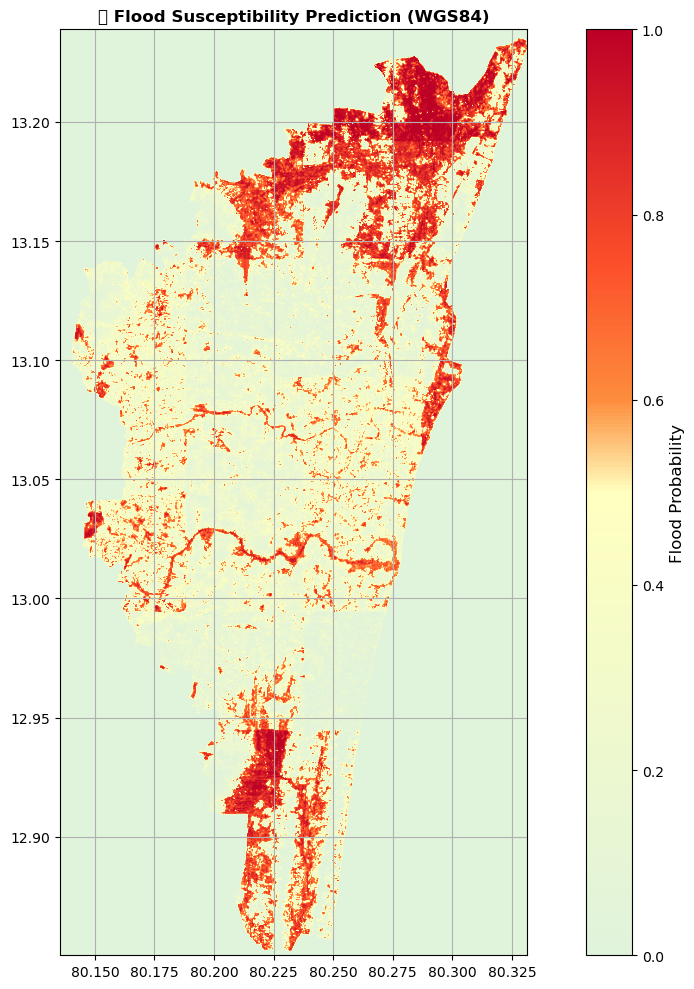

In [13]:
import geopandas as gpd
import rasterio
import rasterio.features
from rasterio.transform import from_origin
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# ------------------ STEP 1: Reproject and Setup ------------------

# Reproject to projected CRS (meters) for rasterizing
gdf_large_proj = gdf_large.to_crs(epsg=32643)

# Bounding box
minx, miny, maxx, maxy = gdf_large_proj.total_bounds
print(f"🗺️ Bounds (meters): {minx}, {miny}, {maxx}, {maxy}")

# Raster resolution
pixel_size = 40
width = int((maxx - minx) / pixel_size)
height = int((maxy - miny) / pixel_size)

# Raster transform
transform = from_origin(minx, maxy, pixel_size, pixel_size)

# ------------------ STEP 2: Rasterization ------------------

shapes = list(zip(gdf_large_proj.geometry, gdf_large_proj['Flood_Prob']))

raster = rasterio.features.rasterize(
    shapes=shapes,
    out_shape=(height, width),
    transform=transform,
    fill=0.0,
    all_touched=True,
    dtype='float32'
)

print("✅ Rasterization complete.")

# ------------------ STEP 3: Save Raster ------------------

meta = {
    'driver': 'GTiff',
    'height': raster.shape[0],
    'width': raster.shape[1],
    'count': 1,
    'dtype': 'float32',
    'crs': gdf_large_proj.crs,
    'transform': transform
}

temp_path = 'Flood_Prediction_40m_TEMP.tif'

with rasterio.open(temp_path, 'w', **meta) as dst:
    dst.write(raster, 1)

print(f"🗂️ Intermediate raster saved: {temp_path}")

# ------------------ STEP 4: Reproject Raster to WGS84 (EPSG:4326) ------------------

reprojected_path = 'Flood_Prediction_40m_LatLong.tif'

with rasterio.open(temp_path) as src:
    dst_crs = 'EPSG:4326'
    transform, width, height = rasterio.warp.calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(reprojected_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            rasterio.warp.reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=rasterio.warp.Resampling.bilinear
            )

print(f"🌍 Reprojected raster saved as: {reprojected_path}")

# ------------------ STEP 5: Visualization with Enhanced Color Stretch ------------------

# Custom colormap: stretch reds from 0.5 to 1.0
colors = [
    (0.0, '#e0f3db'),   # light green
    (0.5, '#ffffbf'),   # yellow
    (0.6, '#fd8d3c'),   # orange
    (0.75, '#fc4e2a'),  # deep orange
    (1.0, '#bd0026')    # dark red
]
custom_cmap = LinearSegmentedColormap.from_list("FloodStretch", colors)

# Display final raster
with rasterio.open(reprojected_path) as src:
    fig, ax = plt.subplots(figsize=(12, 10))
    img = show(src, ax=ax, cmap=custom_cmap, title='🌊 Flood Susceptibility Prediction (WGS84)', vmin=0, vmax=1)
    cbar = plt.colorbar(img.get_images()[0], ax=ax, orientation='vertical')
    cbar.set_label('Flood Probability', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
